First 5 rows of data:
    AREA  PRICE
0  1000   5618
1  1030   5201
2  1060   4779
3  1090   5425
4  1120   5657


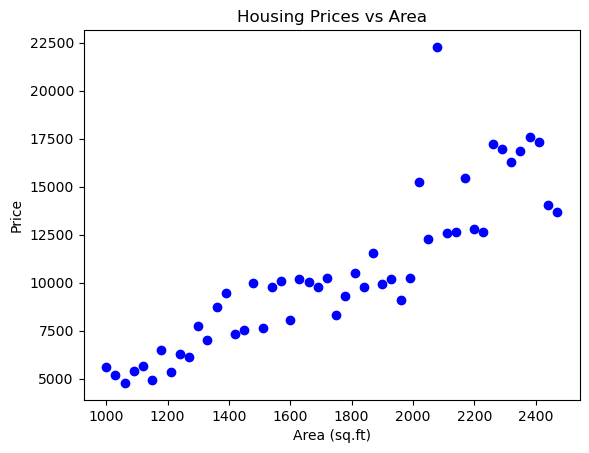


Sample X values:
 [[1000]
 [1030]
 [1060]
 [1090]
 [1120]]
Sample Y values:
 [5618 5201 4779 5425 5657]

Training samples: 40
Testing samples: 10

Model trained successfully!
Intercept (b0): -3103.34066448488
Slope (b1): [7.75979089]

Predicted prices:
For 2000 sq.ft → 12416.241117143778
For 2500 sq.ft → 16296.136562550942

Model Accuracy:
R² score on Training data: 0.865632112064227
R² score on Testing data: 0.570954870212099


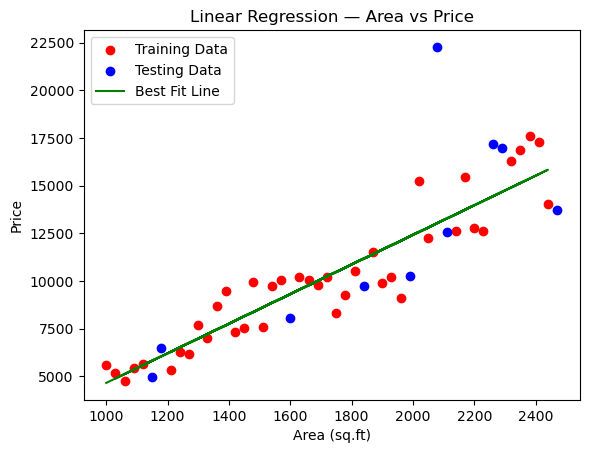

In [2]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# -------------------------------------------------------------
# Step 2: Load the dataset
# -------------------------------------------------------------
df = pd.read_csv("housing_prices_SLR.csv")   # File should have 'AREA' and 'PRICE' columns
df.head()

# -------------------------------------------------------------
# Step 3: Basic visualization
# -------------------------------------------------------------
plt.scatter(df['AREA'], df['PRICE'], color='blue')
plt.title("Housing Prices vs Area")
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price")
plt.show()

# -------------------------------------------------------------
# Step 4: Prepare X (input) and Y (output)
# -------------------------------------------------------------
X = df[['AREA']].values   # Independent variable (2D array)
Y = df['PRICE'].values    # Dependent variable (1D array)

print("\nSample X values:\n", X[:5])
print("Sample Y values:\n", Y[:5])

# -------------------------------------------------------------
# Step 5: Split data for training & testing
# -------------------------------------------------------------
# 80% data for training, 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=100
)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# -------------------------------------------------------------
# Step 6: Train the Linear Regression model
# -------------------------------------------------------------
model = LinearRegression()
model.fit(X_train, Y_train)

print("\nModel trained successfully!")
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_)

# -------------------------------------------------------------
# Step 7: Make predictions
# -------------------------------------------------------------
predicted = model.predict(np.array([[2000], [2500]]))
print("\nPredicted prices:")
print("For 2000 sq.ft →", predicted[0])
print("For 2500 sq.ft →", predicted[1])

# -------------------------------------------------------------
# Step 8: Evaluate model performance (R² Score)
# -------------------------------------------------------------
r2_train = r2_score(Y_train, model.predict(X_train))
r2_test = r2_score(Y_test, model.predict(X_test))

print("\nModel Accuracy:")
print("R² score on Training data:", r2_train)
print("R² score on Testing data:", r2_test)

# -------------------------------------------------------------
# Step 9: Visualize regression line
# -------------------------------------------------------------
plt.scatter(X_train, Y_train, color='red', label='Training Data')
plt.scatter(X_test, Y_test, color='blue', label='Testing Data')

# Regression line
plt.plot(X_train, model.predict(X_train), color='green', label='Best Fit Line')

plt.title("Linear Regression — Area vs Price")
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price")
plt.legend()
plt.show()
